In [103]:
%matplotlib inline
import numpy as np
import torch
from torch.autograd import Variable
from models import Generator
from torchvision.utils import make_grid
from torchvision import transforms

In [112]:
mnist_generator = Generator(100)
mnist_generator.load_state_dict(torch.load('saved_models/mnist_generator.pt'))

In [115]:
fashion_generator = Generator(100)
fashion_generator.load_state_dict(torch.load('saved_models/fashion_generator.pt'))

In [113]:
def interpolate_grid(generator, latent_shape, n_interpolates, n_rows):
    latent_points = []
    for i in range(n_rows):
        z1 = torch.randn(latent_shape)
        z2 = torch.randn(latent_shape)
        for alpha in np.linspace(0, 1, n_interpolates):
                z = alpha * z1 + (1 - alpha) * z2
                z = Variable(z).unsqueeze(0)
                latent_points.append(z)
    latent_points = torch.cat(latent_points)
    grid = make_grid(generator(latent_points), nrow=n_interpolates, normalize=True)
    return transforms.ToPILImage()(grid)

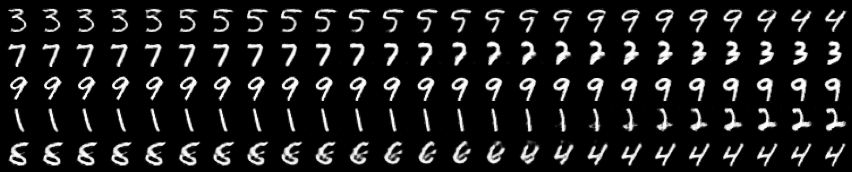

In [114]:
interpolate_grid(mnist_generator, [100, 1, 1], 25, 5)

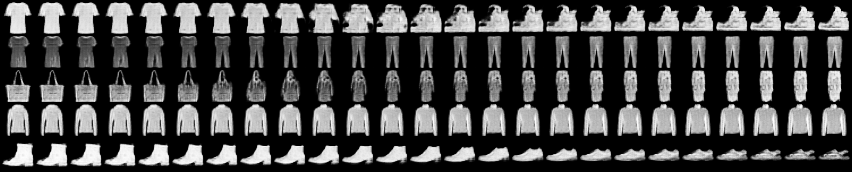

In [116]:
interpolate_grid(fashion_generator, [100, 1, 1], 25, 5)